<a href="https://colab.research.google.com/github/WinnieAnyoso/Supervised_and-_unsupervised_ML_R/blob/master/PART_3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("arules")
# Loading the arules library
#
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [8]:
Transactions <- read.transactions("Supermarket_Sales_Dataset II.csv")
Transactions

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 5729 items (columns)

In [9]:
class(Transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

In [10]:
inspect(Transactions[1:5])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


In [11]:
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# ---
# 
items<-as.data.frame(itemLabels(Transactions))
colnames(items) <- "Item"
head(items, 10)

,Item
,<fct>
1,&
2,accessories
3,"accessories,antioxydant"
4,"accessories,champagne,fresh"
5,"accessories,champagne,protein"
6,"accessories,chocolate"
7,"accessories,chocolate,champagne,frozen"
8,"accessories,chocolate,frozen"
9,"accessories,chocolate,low"


In [12]:
summary(Transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 5729 columns (items) and a density of 0.0005421748 

most frequent items:
    tea   wheat mineral     fat  yogurt (Other) 
    803     645     577     574     543   20157 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   15   16 
1603 2007 1382  942  651  407  228  151   70   39   13    5    1    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.106   4.000  16.000 

includes extended item information - examples:
                   labels
1                       &
2             accessories
3 accessories,antioxydant

In [14]:
itemFrequency(Transactions[, 3:10],type = "absolute")
round(itemFrequency(Transactions[, 3:10],type = "relative")*100,2)

accessories,antioxydant            accessories,champagne,fresh 
                                     1                                      1 
         accessories,champagne,protein                  accessories,chocolate 
                                     1                                      1 
accessories,chocolate,champagne,frozen           accessories,chocolate,frozen 
                                     1                                      1 
             accessories,chocolate,low       accessories,chocolate,pasta,salt 
                                     1                                      1

accessories,antioxydant            accessories,champagne,fresh 
                                  0.01                                   0.01 
         accessories,champagne,protein                  accessories,chocolate 
                                  0.01                                   0.01 
accessories,chocolate,champagne,frozen           accessories,chocolate,frozen 
                                  0.01                                   0.01 
             accessories,chocolate,low       accessories,chocolate,pasta,salt 
                                  0.01                                   0.01

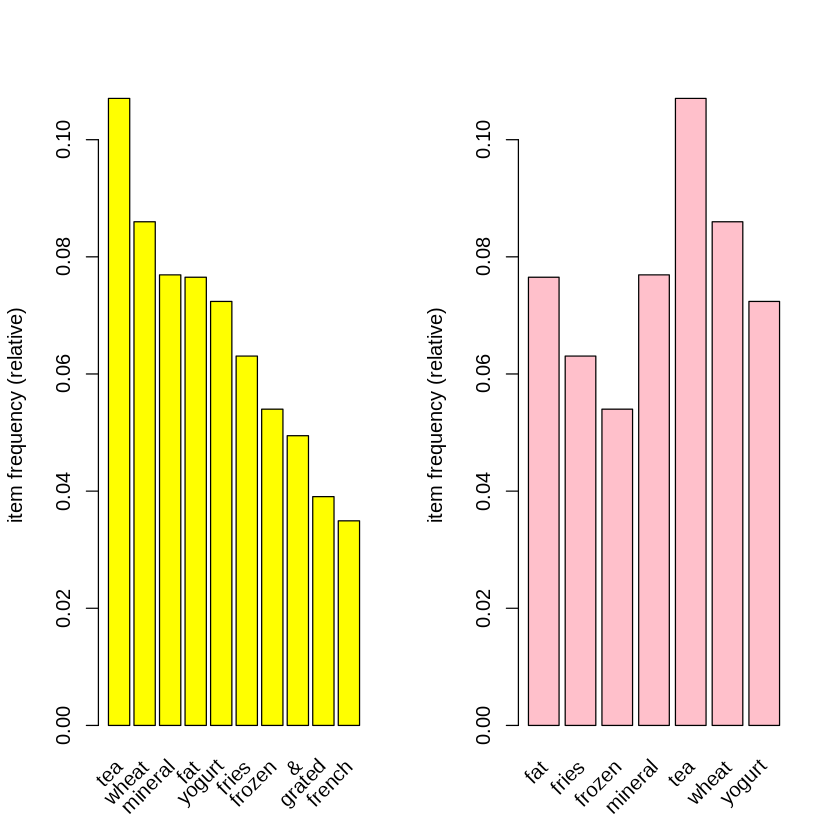

In [38]:
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(Transactions, topN = 10,col="yellow")
itemFrequencyPlot(Transactions, support = 0.05,col="pink")

In [40]:
rules <- apriori (Transactions, parameter = list(supp = 0.004, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [98 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [37 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 37 rules 

In [42]:

# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (Transactions,parameter = list(supp = 0.004, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (Transactions, parameter = list(supp = 0.004, conf = 0.6)) 

rules2

rules3


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [98 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [37 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
 

set of 37 rules 

set of 43 rules 

In [43]:
summary(rules)

set of 37 rules

rule length distribution (lhs + rhs):sizes
 2  3 
21 16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.432   3.000   3.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.004133   Min.   :0.8125   Min.   :0.004266   Min.   :  8.604  
 1st Qu.:0.004666   1st Qu.:0.9448   1st Qu.:0.004666   1st Qu.: 11.629  
 Median :0.005199   Median :1.0000   Median :0.005599   Median : 13.068  
 Mean   :0.010110   Mean   :0.9704   Mean   :0.010618   Mean   : 22.077  
 3rd Qu.:0.006932   3rd Qu.:1.0000   3rd Qu.:0.006932   3rd Qu.: 13.514  
 Max.   :0.068391   Max.   :1.0000   Max.   :0.076523   Max.   :197.395  
     count       
 Min.   : 31.00  
 1st Qu.: 35.00  
 Median : 39.00  
 Mean   : 75.84  
 3rd Qu.: 52.00  
 Max.   :513.00  

mining info:
         data ntransactions support confidence
 Transactions          7501   0.004        0.8

In [44]:

inspect(rules[1:5])

    lhs              rhs      support     confidence coverage    lift     
[1] {low}         => {yogurt} 0.005999200 0.9782609  0.006132516 13.513692
[2] {low}         => {fat}    0.006132516 1.0000000  0.006132516 13.067944
[3] {rice,french} => {wheat}  0.004132782 0.9393939  0.004399413 10.924642
[4] {fries,low}   => {fat}    0.004399413 1.0000000  0.004399413 13.067944
[5] {bread,green} => {tea}    0.004132782 0.9393939  0.004399413  8.775086
    count
[1] 45   
[2] 46   
[3] 31   
[4] 33   
[5] 31   


In [45]:
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs               rhs     support     confidence coverage    lift     count
[1] {low}          => {fat}   0.006132516 1          0.006132516 13.06794 46   
[2] {fries,low}    => {fat}   0.004399413 1          0.004399413 13.06794 33   
[3] {fries,green}  => {tea}   0.006799093 1          0.006799093  9.34122 51   
[4] {rice,cooking} => {wheat} 0.004266098 1          0.004266098 11.62946 32   
[5] {bread,low}    => {fat}   0.004266098 1          0.004266098 13.06794 32   


In [48]:
wheat <- subset(rules, subset = rhs %pin% "wheat")
 
# Then order by confidence
wheat<-sort(wheat, by="confidence", decreasing=TRUE)
inspect(wheat[1:5])

    lhs                   rhs     support     confidence coverage    lift    
[1] {rice,cooking}     => {wheat} 0.004266098 1.0000000  0.004266098 11.62946
[2] {water,whole}      => {wheat} 0.005599253 1.0000000  0.005599253 11.62946
[3] {pasta,ground}     => {wheat} 0.004532729 1.0000000  0.004532729 11.62946
[4] {vegetables,whole} => {wheat} 0.004932676 1.0000000  0.004932676 11.62946
[5] {rice}             => {wheat} 0.012265031 0.9583333  0.012798294 11.14490
    count
[1] 32   
[2] 42   
[3] 34   
[4] 37   
[5] 92   
